In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
dfTrain = pd.read_csv('data/train.csv')
dfTest = pd.read_csv('data/test.csv')

In [3]:
dfTrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
#Employee ID would not be important feature here.
dfTrain = dfTrain.drop(columns = ['employee_id'])

In [5]:
dfTrain.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [7]:
dfTrain['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [8]:
dfTrain.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
#Education and Previous year rating missing!!
#getting value counts of all promoted employees
dfTrain[dfTrain['is_promoted']==1]['previous_year_rating'].value_counts()

5.0    1921
3.0    1355
4.0     784
2.0     181
1.0      88
Name: previous_year_rating, dtype: int64

In [10]:
#checking correlation among features
import seaborn as sns
import matplotlib.pyplot as plt
corr = dfTrain.corr()
sns.heatmap(corr, cmap="Blues")
plt.show()


<Figure size 640x480 with 2 Axes>

In [11]:
#getting the rating counts of employees who got promoted and had KPI>80%
dfTrain[dfTrain['KPIs_met >80%'] & dfTrain['is_promoted']==1]['previous_year_rating'].value_counts()

5.0    1307
3.0     904
4.0     638
2.0     118
1.0      57
Name: previous_year_rating, dtype: int64

In [12]:
dfTrain.groupby(['KPIs_met >80%','is_promoted']).mean()

no_of_trainings        age  previous_year_rating  \
KPIs_met >80% is_promoted                                                     
0             0                   1.276362  34.969101              2.963146   
              1                   1.203414  34.445946              3.957088   
1             0                   1.217793  34.577890              3.916088   
              1                   1.203250  34.341508              3.998677   

                           length_of_service  awards_won?  avg_training_score  
KPIs_met >80% is_promoted                                                      
0             0                     6.124623     0.005922           62.026297  
              1                     5.748222     0.169986           76.878378  
1             0                     5.357539     0.031755           63.970054  
              1                     5.702636     0.098099           68.931637

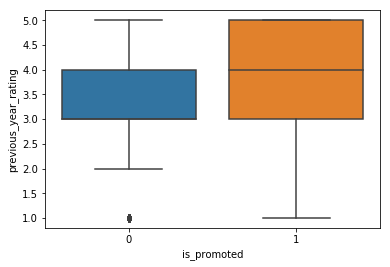

In [13]:
sns.boxplot(y='previous_year_rating', x='is_promoted', data=dfTrain)

In [14]:
#impute numerical - prev_year_rating
#dfTrain['previous_year_rating'].fillna(dfTrain['previous_year_rating'].median(),inplace=True)

In [14]:
#dfTrain.isna().sum()

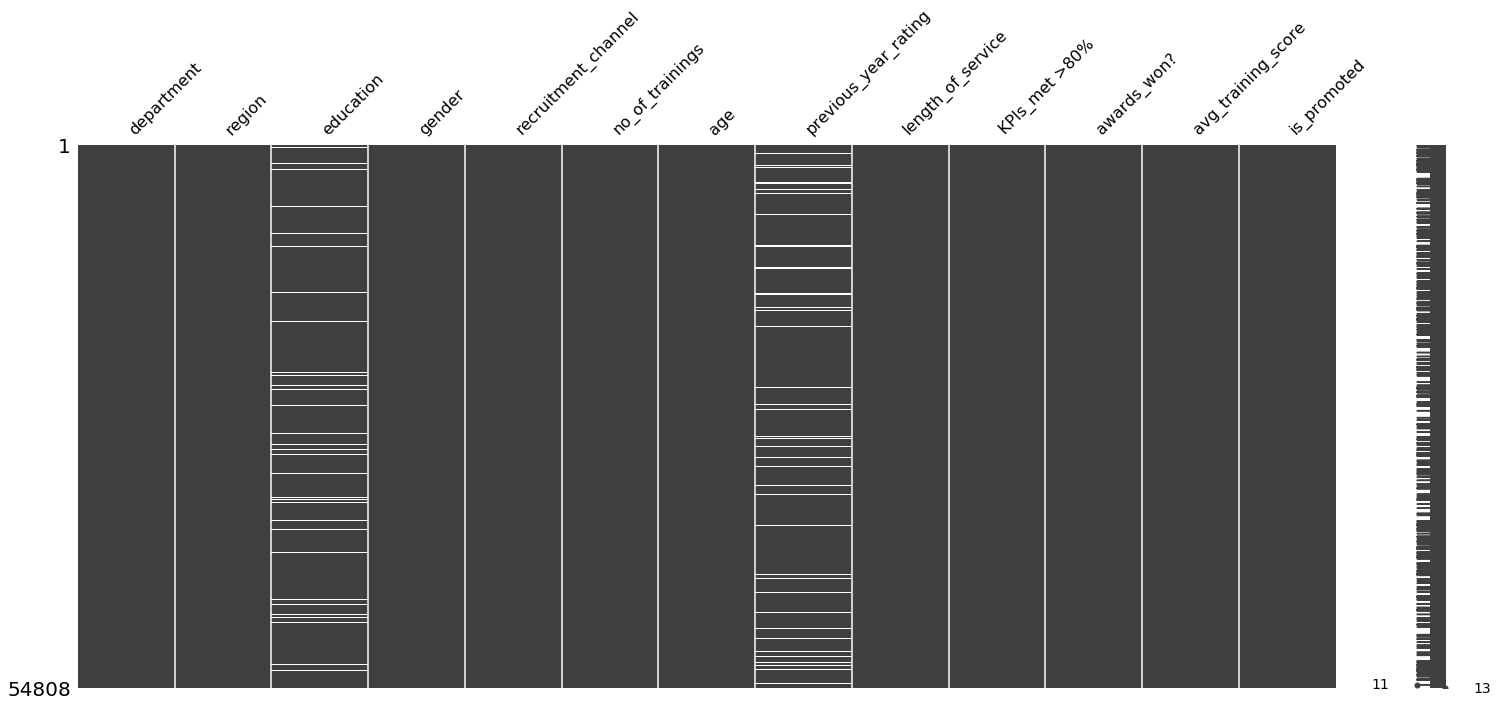

In [15]:
#The white horizontal lines represent missing column values
#The vertical bar on the right apart from the heatmap is a line plot for each row's data completeness.
#In this dataset, all rows have 11 - 13 valid values and hence 0 - 2 missing values.

%matplotlib inline
import missingno as msno
msno.matrix(dfTrain)

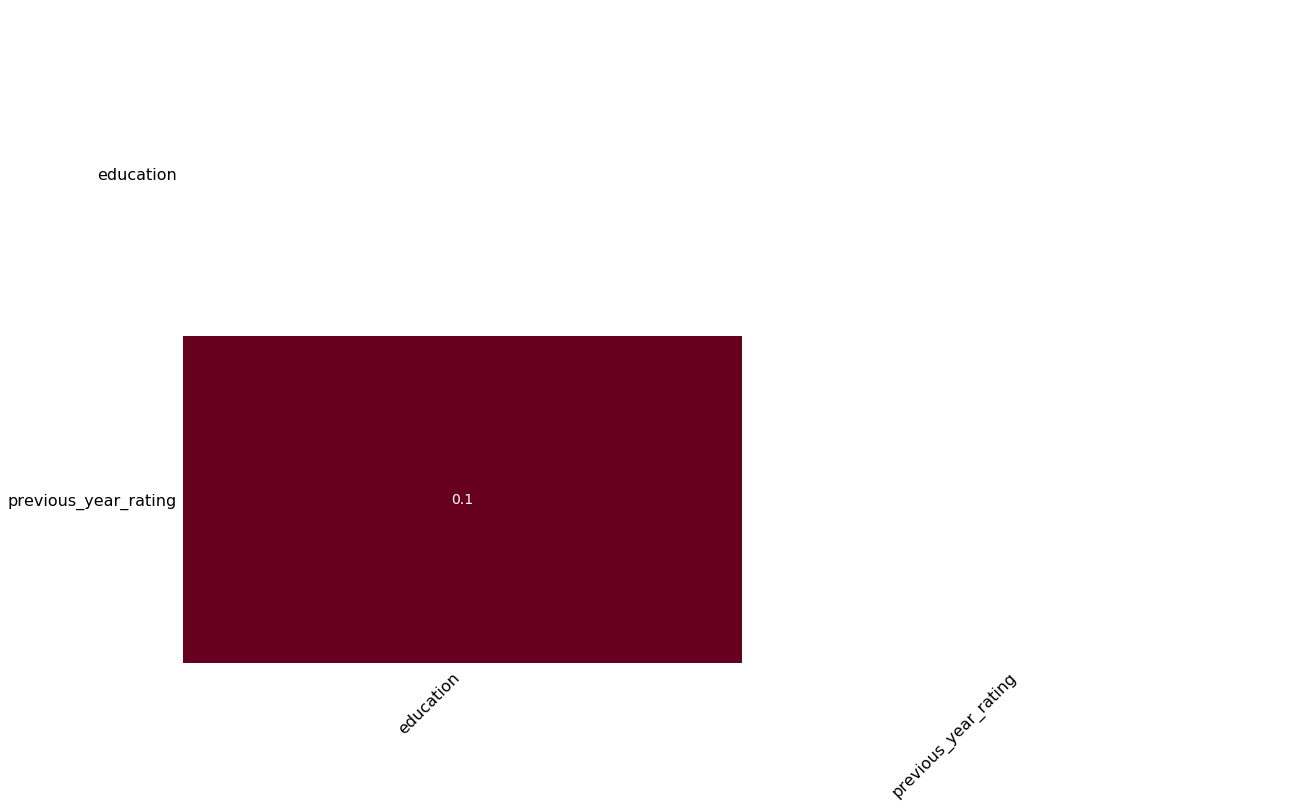

In [16]:
#The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable
#affects the presence of another:
msno.heatmap(dfTrain)

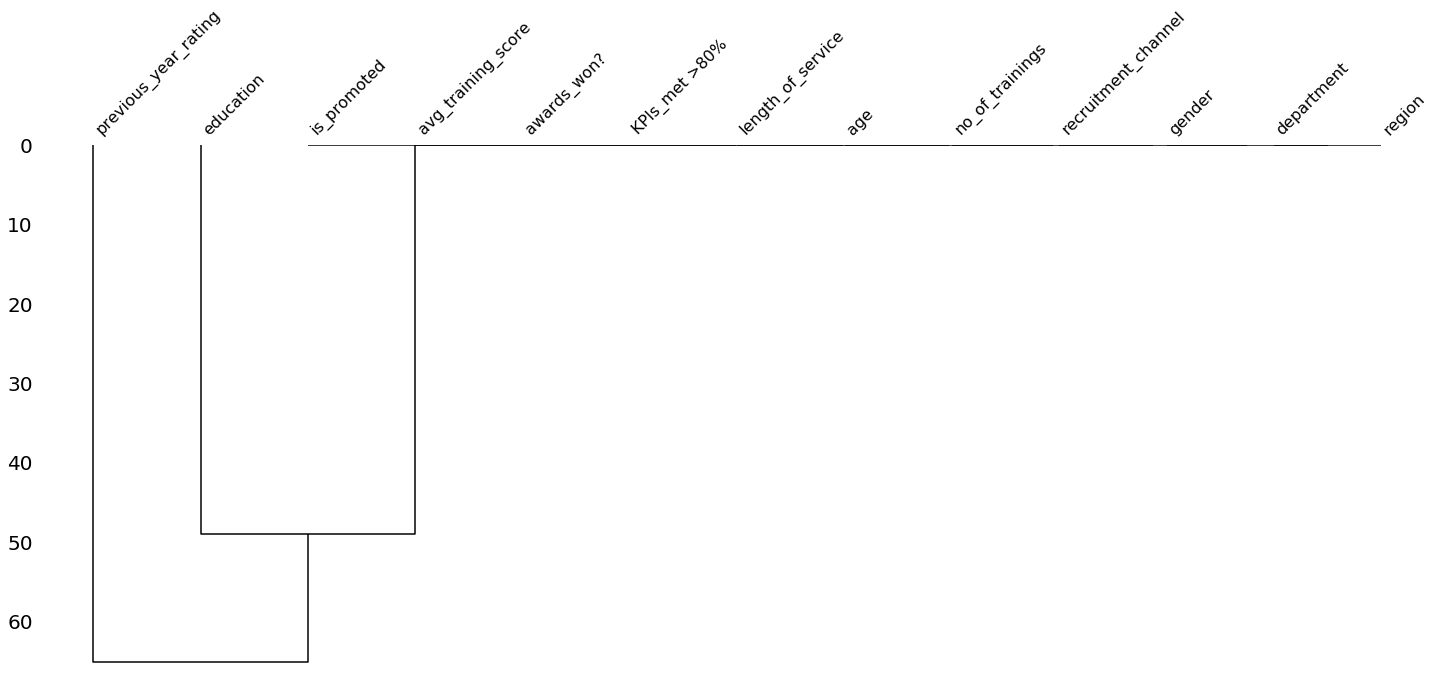

In [17]:
msno.dendrogram(dfTrain)

In [ ]:
#http://www.awesomestats.in/python-data-preprocessing/